In [95]:
#import dependencies
import statsmodels.api as sm
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

%matplotlib inline

In [96]:
#weekly gas prices in San Francisco Area
#read csv 
weekly_gas_prices = pd.read_csv("Resources/weekly_gas_prices_ca.csv")

#rename column 
weekly_gas_prices = weekly_gas_prices.rename(columns={'Weekly San Francisco All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)':'Price'})

#preview data
weekly_gas_prices.head()

weekly_gas_prices = weekly_gas_prices.set_index("Date")
weekly_gas_prices = weekly_gas_prices.dropna()
weekly_gas_prices.head()

,Price
Date,
"Sep 16, 2013",4.096
"Sep 23, 2013",4.052
"Sep 30, 2013",3.980
"Oct 07, 2013",3.898
"Oct 14, 2013",3.840


In [97]:
weekly_gas_prices.index

Index(['Sep 16, 2013', 'Sep 23, 2013', 'Sep 30, 2013', 'Oct 07, 2013',
       'Oct 14, 2013', 'Oct 21, 2013', 'Oct 28, 2013', 'Nov 04, 2013',
       'Nov 11, 2013', 'Nov 18, 2013',
       ...
       'Jul 02, 2018', 'Jul 09, 2018', 'Jul 16, 2018', 'Jul 23, 2018',
       'Jul 30, 2018', 'Aug 06, 2018', 'Aug 13, 2018', 'Aug 20, 2018',
       'Aug 27, 2018', 'Sep 03, 2018'],
      dtype='object', name='Date', length=260)

In [166]:
#save the gas price values into a list
gas_array = weekly_gas_prices["Price"].values
gas_list = np.ndarray.tolist(gas_array)
len(gas_list)

260

In [98]:
#connect to Google
pytrends = TrendReq(hl='en-US', tz=360)

In [99]:
#set search parameter to 'Tesla'
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [100]:
#import tesla google searches over time
tesla_searches = pytrends.interest_over_time()
tesla_searches.head()

,Tesla,isPartial
date,,
2013-09-15,14,False
2013-09-22,14,False
2013-09-29,20,False
2013-10-06,14,False
2013-10-13,13,False


In [101]:
#append Tesla google search popularity to a list
tesla_array = tesla_searches["Tesla"].values
tesla_list = np.ndarray.tolist(tesla_array)
len(tesla_list)

260

In [102]:
#set parameter to 'Electric car'
kw_list = ['Electric car']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [103]:
#import Electric car Google searches over time
tesla_searches = pytrends.interest_over_time()
tesla_searches.head()

,Electric car,isPartial
date,,
2013-09-15,72,False
2013-09-22,63,False
2013-09-29,71,False
2013-10-06,53,False
2013-10-13,60,False


In [104]:
#append Electric car google search popularity to a list
ecar_array = tesla_searches["Electric car"].values
ecar_list = np.ndarray.tolist(ecar_array)
len(ecar_list)

260

In [105]:
#set parameter to 'Prius'
kw_list = ['Prius']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2018-09-03', geo='US-CA',gprop='')

In [106]:
#import Prius Google searches over time
prius_searches = pytrends.interest_over_time()
prius_searches.head()

,Prius,isPartial
date,,
2013-09-15,49,False
2013-09-22,47,False
2013-09-29,47,False
2013-10-06,55,False
2013-10-13,49,False


In [107]:
#append Prius Google search popularity to a list
prius_array = prius_searches["Prius"].values
prius_list = np.ndarray.tolist(prius_array)
len(prius_list)

260

In [108]:
comparison_df = weekly_gas_prices.assign(Tesla = tesla_list, Electric_Cars = ecar_list, Prius = prius_list)

comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
"Sep 16, 2013",4.096,14,72,49
"Sep 23, 2013",4.052,14,63,47
"Sep 30, 2013",3.980,20,71,47
"Oct 07, 2013",3.898,14,53,55
"Oct 14, 2013",3.840,13,60,49


In [109]:
comparison_df['Price'] = comparison_df['Price']*10

comparison_df.head()


,Price,Tesla,Electric_Cars,Prius
Date,,,,
"Sep 16, 2013",40.96,14,72,49
"Sep 23, 2013",40.52,14,63,47
"Sep 30, 2013",39.80,20,71,47
"Oct 07, 2013",38.98,14,53,55
"Oct 14, 2013",38.40,13,60,49


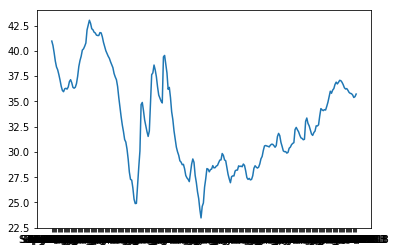

In [110]:
Price_df = comparison_df["Price"]

plt.plot(Price_df)

No handles with labels found to put in legend.


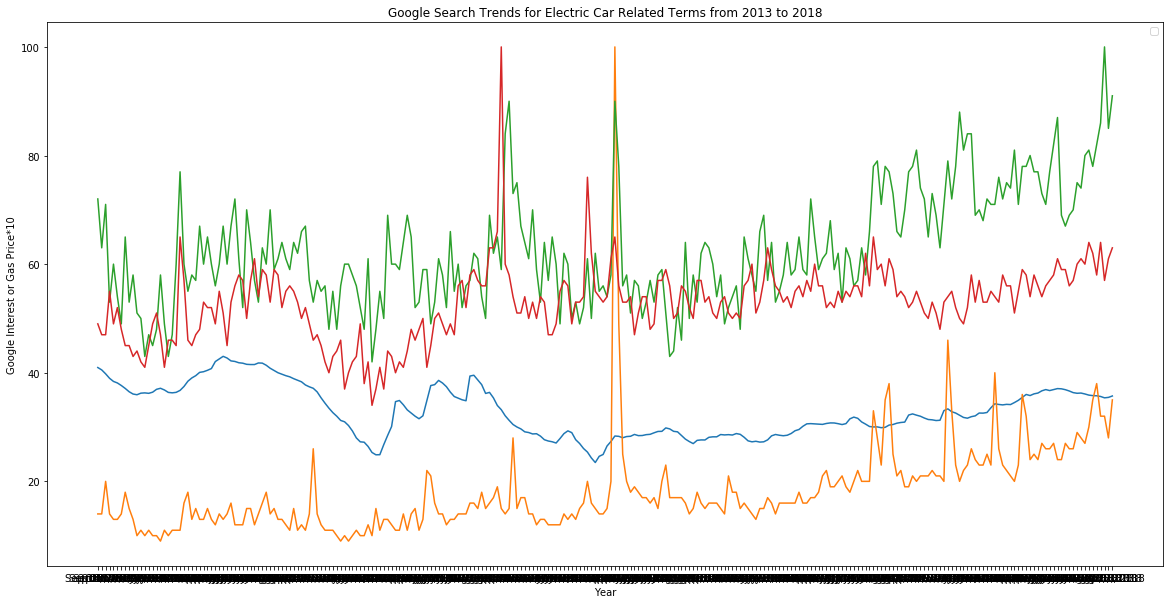

In [111]:
plt.figure(figsize=(20,10))
plt.plot(comparison_df)
plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.xlabel("Year")
plt.ylabel("Google Interest or Gas Price*10")
plt.legend()
plt.show()

In [ ]:
#CLOSER LOOK AT AGGREGATE PLOT
#try splitting the plots by year for a closer look at trends

#search for event on or near date of spike in all car searches- call that out as an area for future data vis
#similar spike for 100% prius search, research associated event

In [139]:
#DATA CLEAN-UP

#TESLA: manually remove the outlier


#call for date value with 100% Tesla search
comparison_df.index[comparison_df['Tesla'] == 100].tolist()


['Mar 28, 2016']

In [143]:
#Try plotting after that date and before that date separately

#set search parameter to 'Tesla'
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2013-09-09 2016-03-21', geo='US-CA',gprop='')


In [144]:
#import tesla google searches over time
tesla_searches_clean1 = pytrends.interest_over_time()
tesla_searches_clean1.head()

,Tesla,isPartial
date,,
2013-09-15,49,False
2013-09-22,50,False
2013-09-29,73,False
2013-10-06,48,False
2013-10-13,47,False


In [147]:
#append Tesla google search popularity to a list
tesla_clean1_array = tesla_searches_clean1['Tesla'].values
tesla_clean1_list = np.ndarray.tolist(tesla_clean1_array)
len(tesla_clean1_list)

132

In [148]:
#set search parameter to 'Tesla'
kw_list = ['Tesla']
pytrends.build_payload(kw_list, cat=0, timeframe='2016-03-29 2018-09-03', geo='US-CA',gprop='')

In [149]:
#import tesla google searches over time
tesla_searches_clean2 = pytrends.interest_over_time()
tesla_searches_clean2.head()

,Tesla,isPartial
date,,
2016-04-03,100,False
2016-04-10,52,False
2016-04-17,43,False
2016-04-24,37,False
2016-05-01,41,False


In [150]:
#append Tesla google search popularity to a list
tesla_clean2_array = tesla_searches_clean2['Tesla'].values
tesla_clean2_list = np.ndarray.tolist(tesla_clean2_array)
len(tesla_clean2_list)

127

In [159]:
placeholder = [100]


In [161]:
#aggregate the two with an avg value as a placeholder where the spike was?
tesla_clean_list = tesla_clean1_list + placeholder + tesla_clean2_list
len(tesla_clean_list)

260

In [162]:
comparison_df = weekly_gas_prices.assign(Tesla = tesla_clean_list, Electric_Cars = ecar_list, Prius = prius_list)
comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
"Sep 16, 2013",4.096,49,72,49
"Sep 23, 2013",4.052,50,63,47
"Sep 30, 2013",3.980,73,71,47
"Oct 07, 2013",3.898,48,53,55
"Oct 14, 2013",3.840,47,60,49


In [164]:
comparison_df['Price'] = comparison_df['Price']*10
comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
"Sep 16, 2013",40.96,49,72,49
"Sep 23, 2013",40.52,50,63,47
"Sep 30, 2013",39.80,73,71,47
"Oct 07, 2013",38.98,48,53,55
"Oct 14, 2013",38.40,47,60,49


No handles with labels found to put in legend.


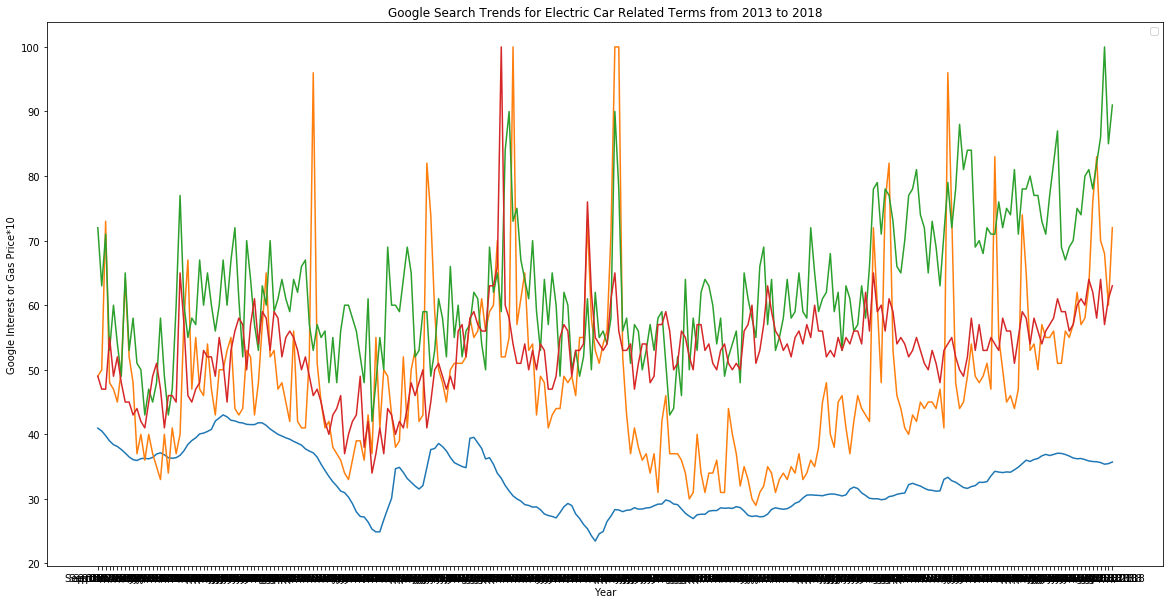

In [165]:
plt.figure(figsize=(20,10))
plt.plot(comparison_df)
plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.xlabel("Year")
plt.ylabel("Google Interest or Gas Price*10")
plt.legend()
plt.show()

In [224]:
#do a rolling average over the 5-year trends data to normalize the spikes for a better visual

from numpy import convolve
 
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

rolling_prius = movingaverage(prius_list,10)

rolling_ecar = movingaverage(ecar_list,10)

rolling_tesla = movingaverage(tesla_clean_list, 10)

In [225]:
#remove first value from gas_list so there are the same amt of values

weekly_gas_prices_rolled = weekly_gas_prices.iloc[9:]
weekly_gas_prices_rolled.head()

,Price
Date,
"Nov 18, 2013",3.608
"Nov 25, 2013",3.595
"Dec 02, 2013",3.624
"Dec 09, 2013",3.629
"Dec 16, 2013",3.621


In [229]:
#save the gas price values into a list
rolled_gas_array = weekly_gas_prices_rolled["Price"].values
rolled_gas_list = np.ndarray.tolist(rolled_gas_array)
len(rolled_gas_list)

251

In [226]:
rolling_comparison_df = weekly_gas_prices_rolled.assign(Tesla = rolling_tesla, Electric_Cars = rolling_ecar, Prius = rolling_prius)

rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
"Nov 18, 2013",3.608,52.6,59.8,48.0
"Nov 25, 2013",3.595,51.4,57.7,47.5
"Dec 02, 2013",3.624,50.4,56.4,47.0
"Dec 09, 2013",3.629,46.7,53.6,46.4
"Dec 16, 2013",3.621,45.9,53.0,45.4


In [227]:
rolling_comparison_df['Price'] = rolling_comparison_df['Price']*10
rolling_comparison_df.head()

,Price,Tesla,Electric_Cars,Prius
Date,,,,
"Nov 18, 2013",36.08,52.6,59.8,48.0
"Nov 25, 2013",35.95,51.4,57.7,47.5
"Dec 02, 2013",36.24,50.4,56.4,47.0
"Dec 09, 2013",36.29,46.7,53.6,46.4
"Dec 16, 2013",36.21,45.9,53.0,45.4


No handles with labels found to put in legend.


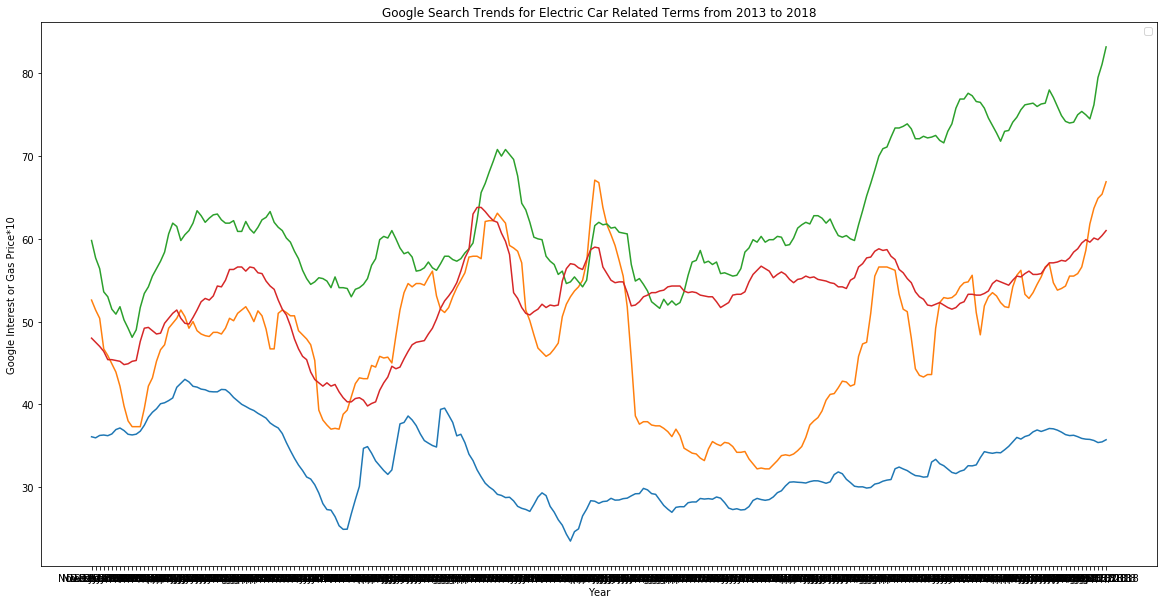

In [228]:
plt.figure(figsize=(20,10))
plt.plot(rolling_comparison_df)
plt.title("Google Search Trends for Electric Car Related Terms from 2013 to 2018")
plt.xlabel("Year")
plt.ylabel("Google Interest or Gas Price*10")
plt.legend()
plt.show()

In [ ]:
#STATISTICAL ANALYSIS

#compare gas price line (independant variable) with each google search result (dependent variables)

#OPTION 1: Create scatter plot for x=gas price y=trend
#          Calculate line of best fit
#          Try it with Prius first

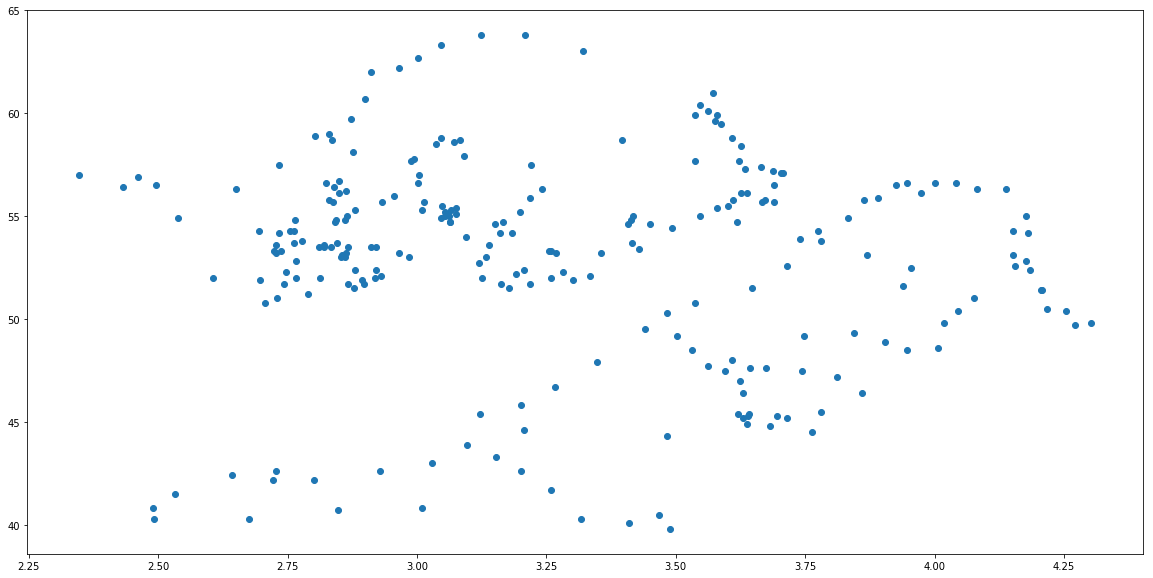

In [230]:
#scatter plot of gas prices v. prius searches

plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_prius, alpha=1)

In [ ]:
#try shifting prius data by subtracting 2 from front of list; subtract two from back of gas list to match value counts


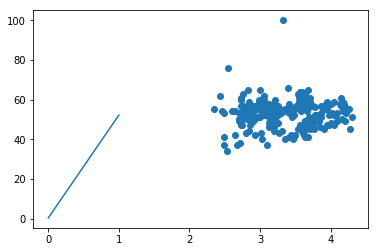

In [123]:

results = sm.OLS(prius_list,sm.add_constant(gas_list)).fit()


plt.scatter(gas_list, prius_list)

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

plt.show()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

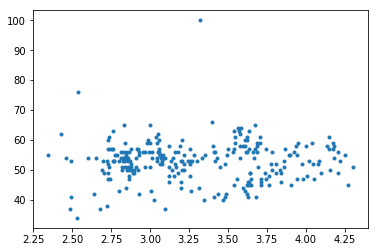

In [128]:
from numpy.polynomial.polynomial import polyfit

# Fit with polyfit
b, m = polyfit(gas_list, prius_list, 1)

plt.plot(gas_list, prius_list, '.')
plt.plot(gas_list, b + m * gas_list, '-')
plt.show()

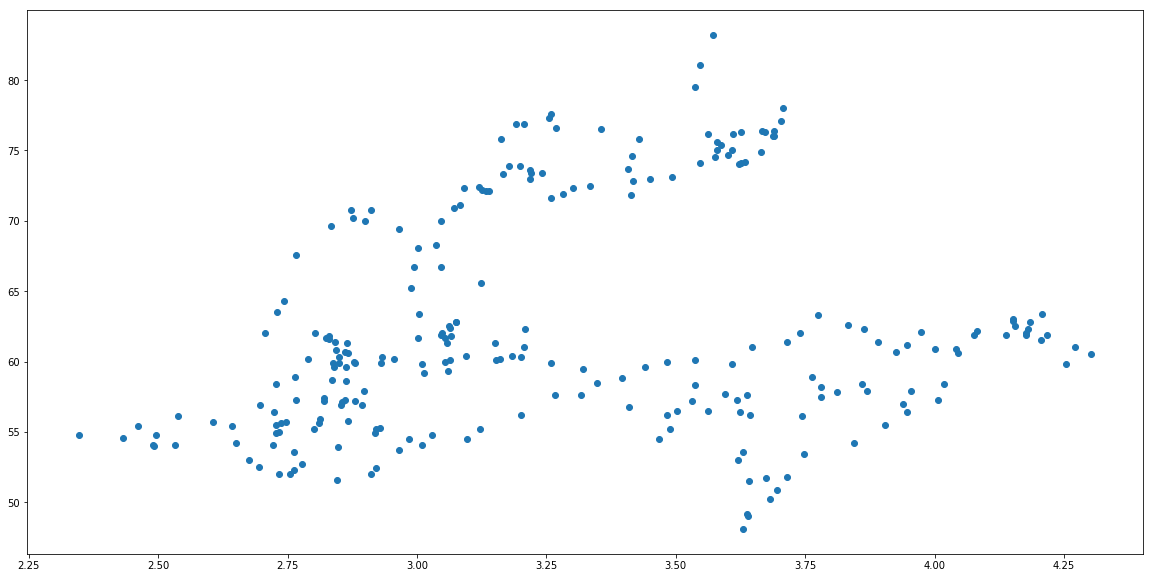

In [231]:
plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_ecar, alpha=1)

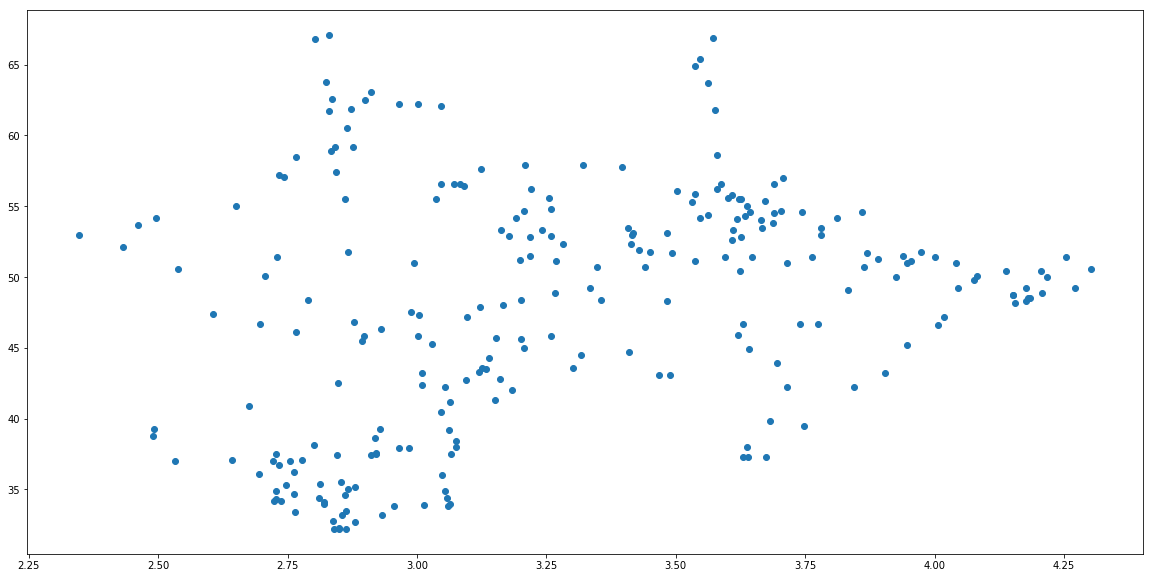

In [232]:
plt.figure(figsize=(20,10))
plt.scatter(rolled_gas_list, rolling_tesla, alpha=1)